In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
%matplotlib inline

## Load data

In [53]:
df = pd.read_csv('car_data.csv')

In [54]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [55]:
df.shape

(301, 9)

## Explore and preprocess data

In [56]:
#unique types of sellers, transmission and owner
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [57]:
#Check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [58]:
#Basics statistics
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


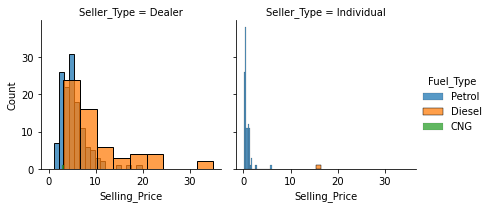

In [64]:
#Plot selling price per fuel type and seller type
g = sns.FacetGrid(df, col="Seller_Type", hue="Fuel_Type")
g.map(sns.histplot, "Selling_Price")
g.add_legend()

In [33]:
#Remove Car_Name colum
df = df.drop(['Car_Name'], axis=1)

In [34]:
#Create nb_OF_years column
df['Nb_Years'] = 2020 - df['Year'].values

In [35]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Nb_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [36]:
#Drop year column
df.drop(['Year'], axis=1, inplace=True)

In [37]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Nb_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [38]:
#Convert categorical variables using one hot encoding
dataset = pd.get_dummies(df, drop_first=True)

In [39]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Nb_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


If the number of categorical modalities is not high, you can use the one hot encoding otherwise use other encoding techniques (label encoding, etc.) 

In [42]:
#Check the correlation
corr_matrix = dataset.corr()

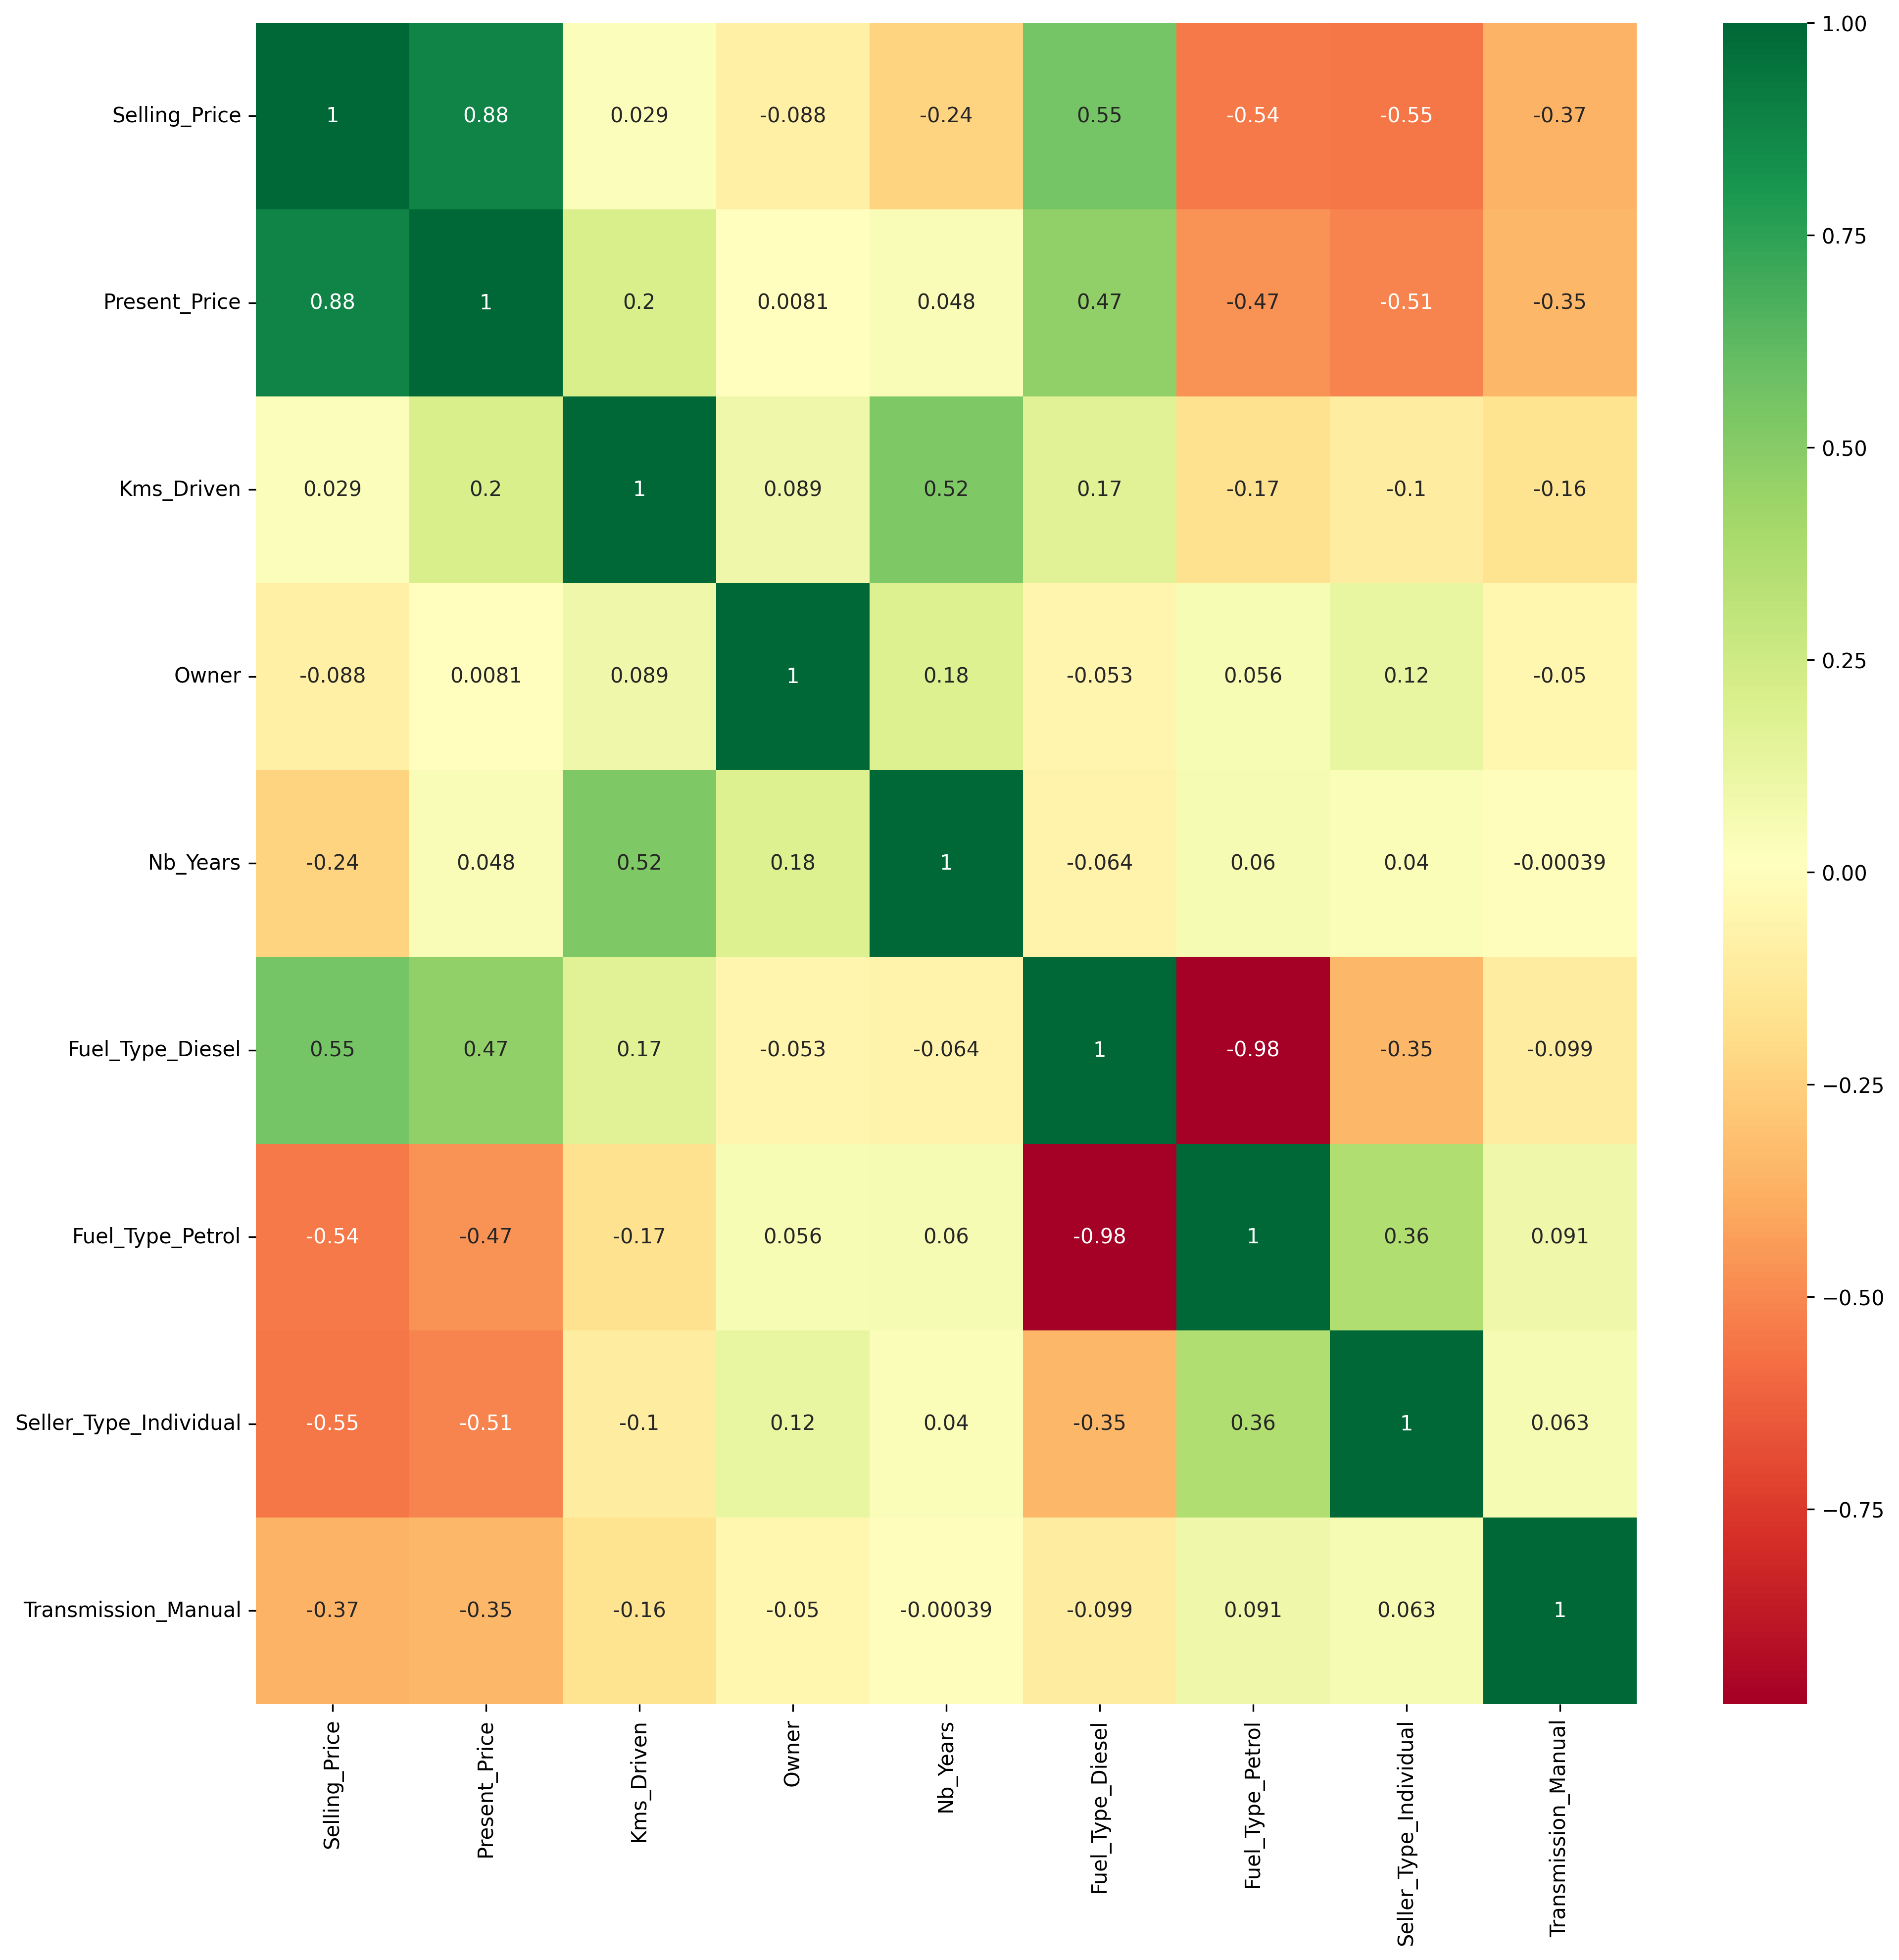

In [70]:
top_corr_features=corr_matrix.index 
plt.figure(figsize=(15,15),dpi=300) 
#plot heat map 
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

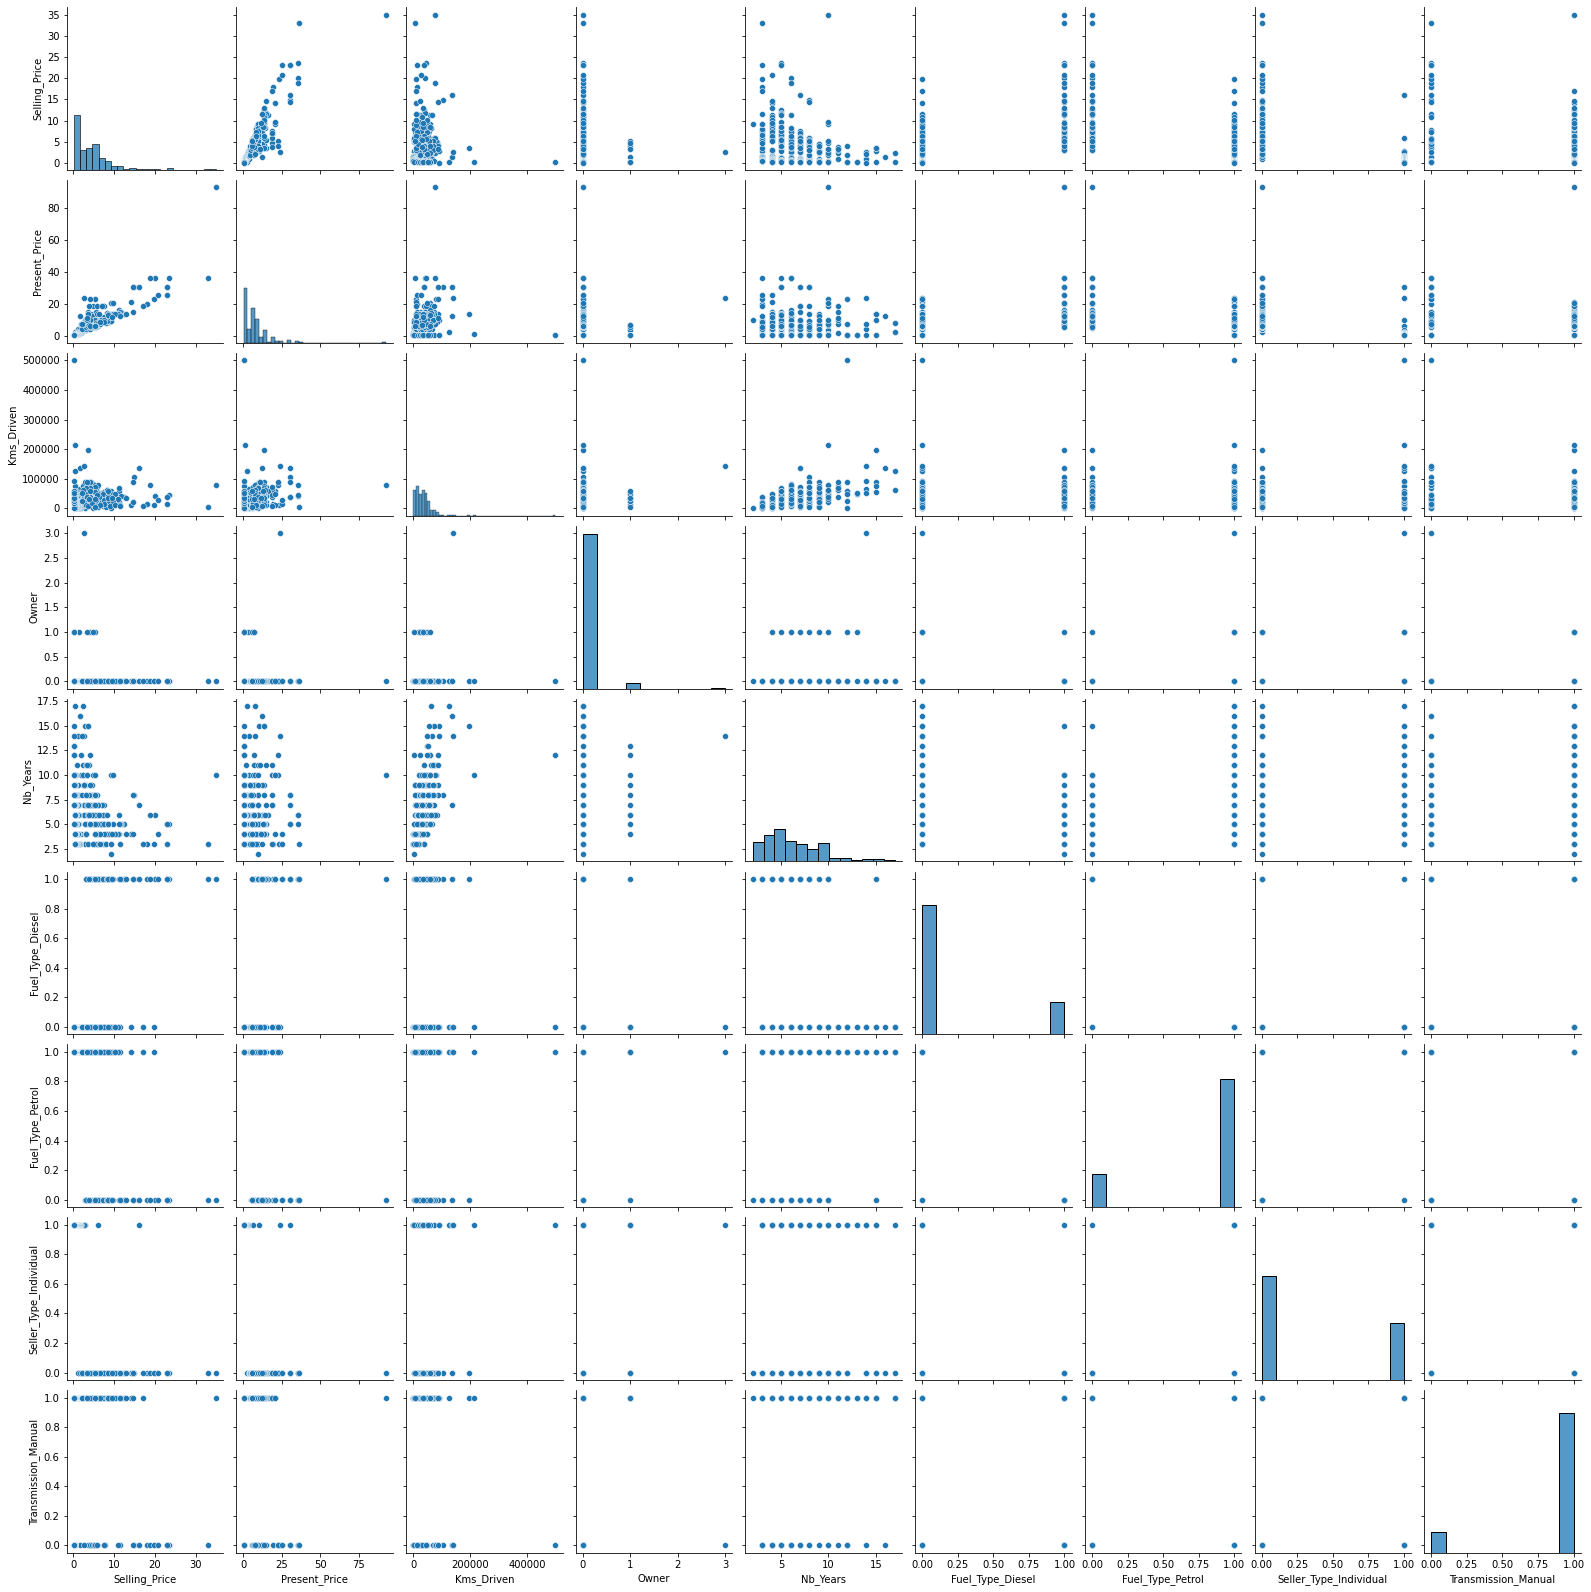

In [51]:
sns.pairplot(dataset)

## Data preparation and feature importance

In [71]:
#Prepare data
X = dataset.drop(['Selling_Price'], axis=1)
y = dataset['Selling_Price']

In [74]:
#Feature importance
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [79]:
print(model.feature_names_in_)

['Present_Price' 'Kms_Driven' 'Owner' 'Nb_Years' 'Fuel_Type_Diesel'
 'Fuel_Type_Petrol' 'Seller_Type_Individual' 'Transmission_Manual']


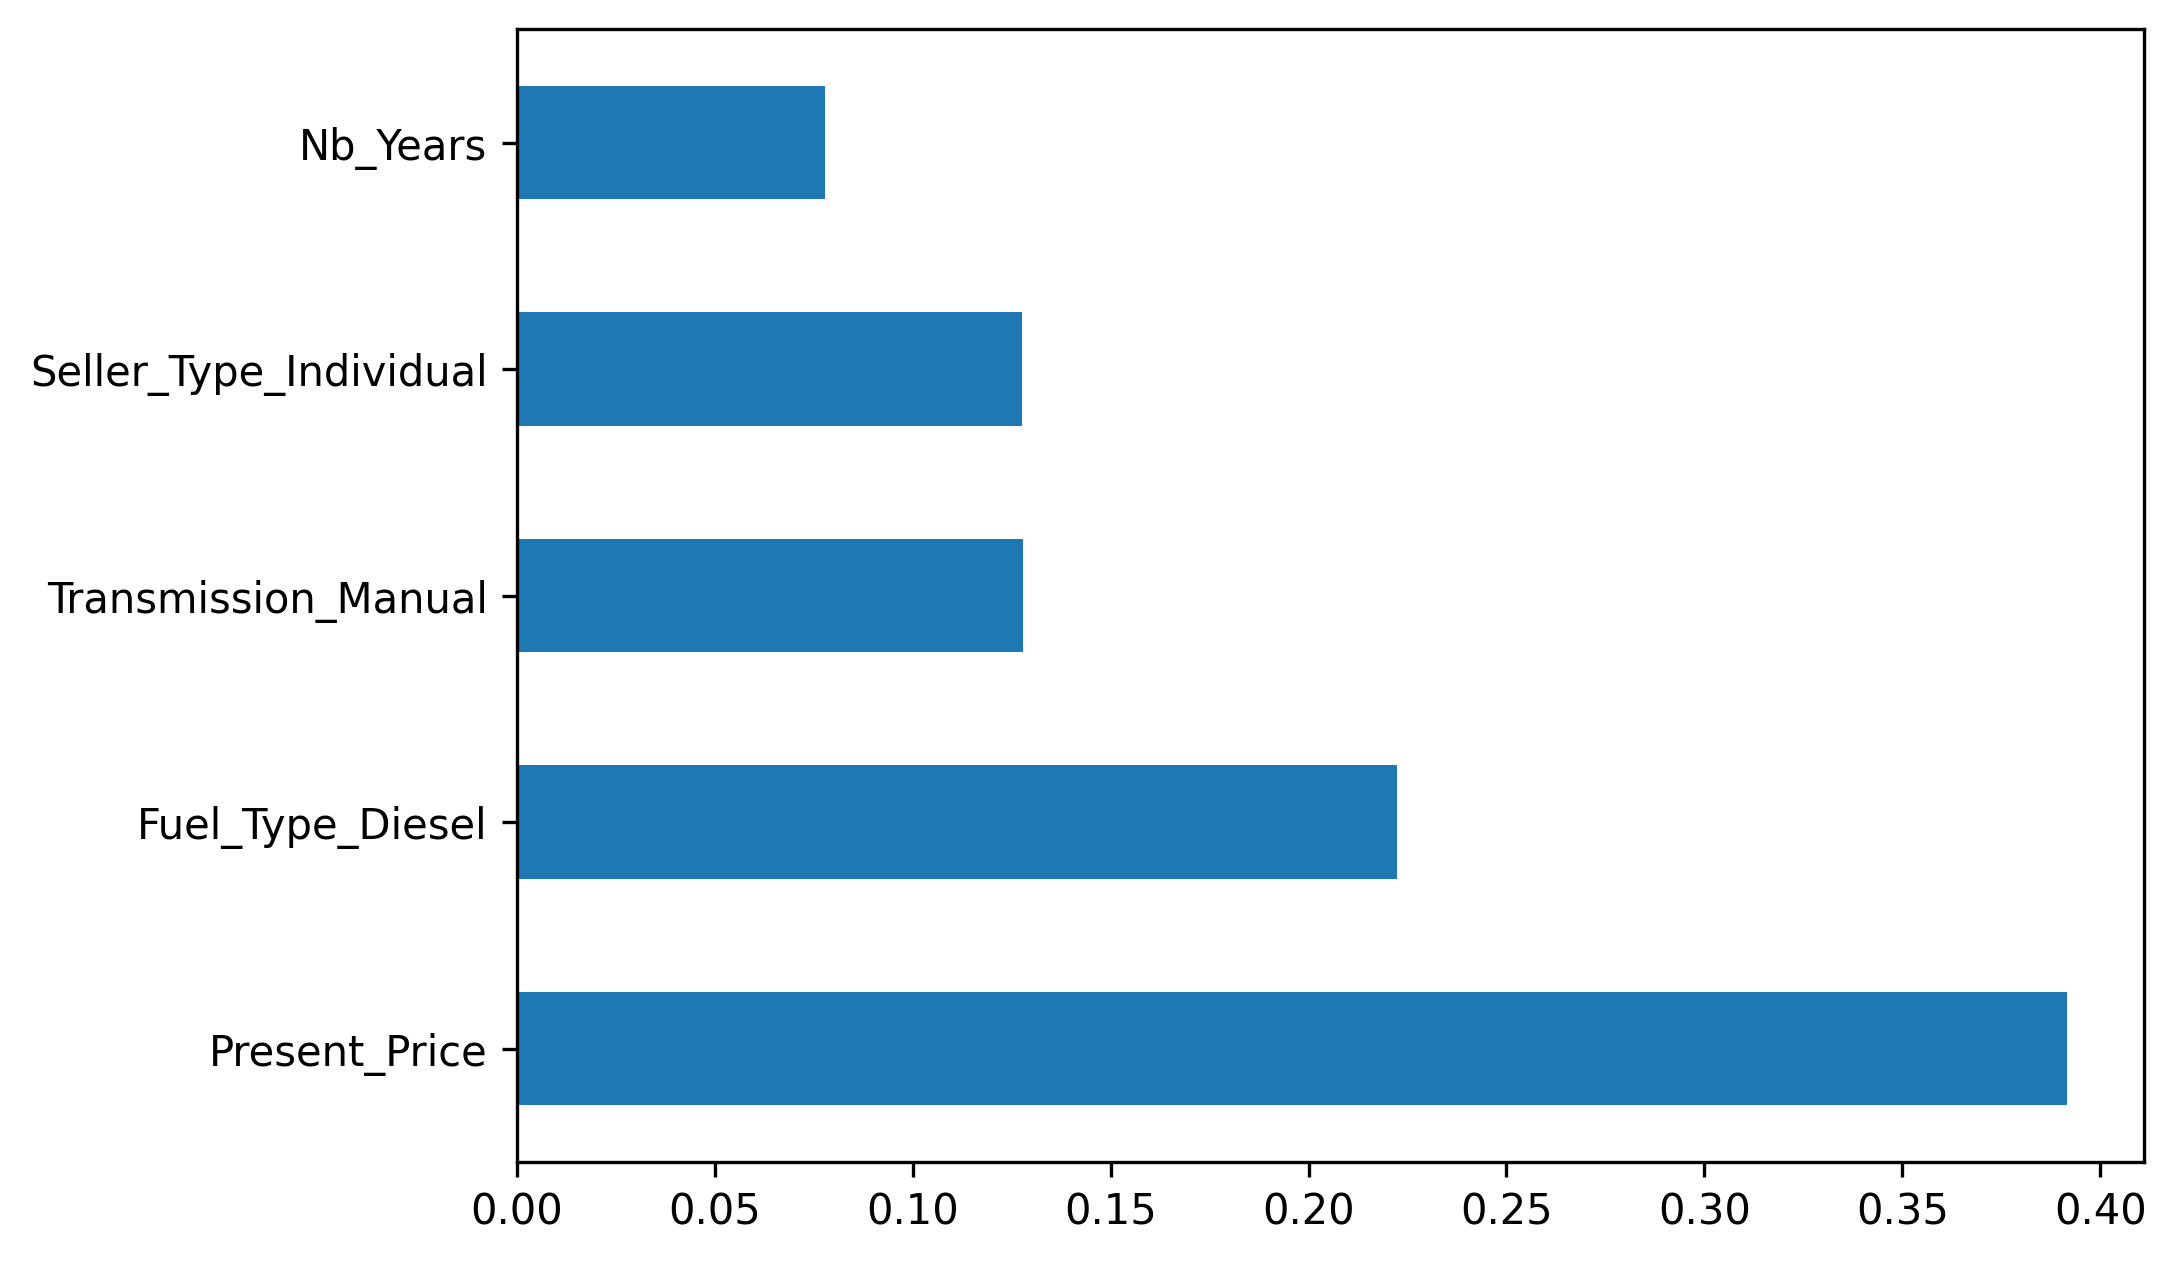

In [80]:
#Plot graph of feature importances for better visualization
plt.figure(figsize=(7,5), dpi=300)
feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()

In [94]:
#Split data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Model building

In [91]:
rf_model = RandomForestRegressor()

Well using decision tree-based algorithms use don't use to normalize data

In [88]:
#Hyperparameter tuning using Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [89]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [90]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [97]:
#verbose parameter shows the details when training is on going
rf_random = RandomizedSearchCV(rf_model, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42, verbose=3, n_jobs=-1)

In [98]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [100]:
predictions = rf_random.predict(X_test)

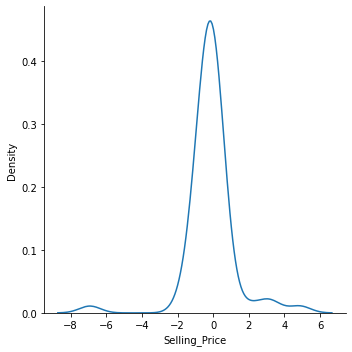

In [105]:
#Compare error between predictions and ground-truths
sns.displot(y_test-predictions, kind='kde')

In [109]:
print(rf_random.cv_results_["mean_test_score"])

[-6.52779662 -5.58786795 -8.36708099 -4.16618441 -7.44761699 -4.07817402
 -9.73372922 -5.81894927 -5.8999738  -4.06824304]


In [113]:
#print R2 score
print(r2_score(y_test, predictions))

0.9013432577232144


## Export the model for deployment

In [114]:
import pickle

In [115]:
# Open a file where you want to store the data
file = open("random_forest_regression_model.pkl", "wb")

# Dump information into the file
pickle.dump(rf_random, file)